# Working with Images & Logistic Regression in PyTorch

This tutorial covers the following topics:
    
* Working with images in PyTorch (using the MNIST dataset)
* Splitting a dataset into training, validation, and test sets
* Creating PyTorch models with custom logic by extending the `nn.Module` class
* Interpreting model outputs as probabilities using Softmax and picking predicted labels
* Picking a useful evaluation metric (accuracy) and loss function (cross-entropy) for classification problems
* Setting up a training loop that also evaluates the model using the validation set
* Testing the model manually on randomly picked examples 




## Working with Images

In this tutorial, we'll use our existing knowledge of PyTorch and linear regression to solve a very different kind of problem: *image classification*. We'll use the famous [*MNIST Handwritten Digits Database*](http://yann.lecun.com/exdb/mnist/) as our training dataset. It consists of 28px by 28px grayscale images of handwritten digits (0 to 9) and labels for each image indicating which digit it represents. Here are some sample images from the dataset:

## Load the MNIST dataset
PyTorch makes the MNIST dataset available through <a href='https://pytorch.org/docs/stable/torchvision/index.html'><tt><strong>torchvision</strong></tt></a>. The first time it's called, the dataset will be downloaded onto your computer to the path specified. From that point, torchvision will always look for a local copy before attempting another download.

![mnist-sample](https://i.imgur.com/CAYnuo1.jpg)



![images-sampe](https://machinelearningmastery.com/wp-content/uploads/2019/02/Plot-of-a-Subset-of-Images-from-the-MNIST-Dataset-1024x768.png)

![28by28](https://www.tensorflow.org/images/MNIST-Matrix.png)



we need to convert the two-dimensional input data into a single-dimensional format for feeding into the model. This is achieved by a process called flattening. In this process, the 28x28 grid image is converted into a single-dimensional array of 784(28x28).



![8-feed](https://zitaoshen.rbind.io/project/machine_learning/how-to-build-your-own-neural-net-from-the-scrach/featured.png)

We begin by installing and importing `torch` and `torchvision`. `torchvision` contains some utilities for working with image data. It also provides helper classes to download and import popular datasets like MNIST automatically

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import numpy as np

from torchvision import datasets

import matplotlib.pyplot as plt

In [ ]:
# Download training dataset
dataset = datasets.MNIST(root='data/', download=True)

When this statement is executed for the first time, it downloads the data to the `data/` directory next to the notebook and creates a PyTorch `Dataset`. On subsequent executions, the download is skipped as the data is already downloaded. Let's check the size of the dataset.

In [ ]:
len(dataset)

60000

In [ ]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FB76C3D19D0>, 5)

It's a pair, consisting of a 28x28px image and a label. The image is an object of the class `PIL.Image.Image`, which is a part of the Python imaging library [Pillow](https://pillow.readthedocs.io/en/stable/). We can view the image within Jupyter using [`matplotlib`](https://matplotlib.org/), the de-facto plotting and graphing library for data science in Python.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

The statement `%matplotlib inline` indicates to Jupyter that we want to plot the graphs within the notebook. Without this line, Jupyter will show the image in a popup. Statements starting with `%` are called magic commands and are used to configure the behavior of Jupyter itself. You can find a full list of magic commands here: https://ipython.readthedocs.io/en/stable/interactive/magics.html .

Let's look at a couple of images from the dataset.

Label: 5


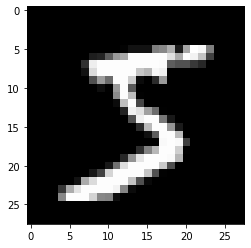

In [ ]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


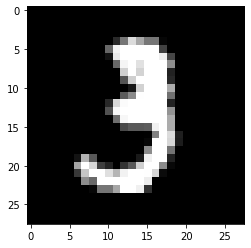

In [ ]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

It's evident that these images are relatively small in size, and recognizing the digits can sometimes be challenging even for the human eye. While it's useful to look at these images, there's just one problem here: PyTorch doesn't know how to work with images. We need to convert the images into tensors. We can do this by specifying a transform while creating our dataset.

PyTorch datasets allow us to specify one or more transformation functions that are applied to the images as they are loaded. The `torchvision.transforms` module contains many such predefined functions. We'll use the `ToTensor` transform to convert images into PyTorch tensors.

In [ ]:
import torchvision.transforms as transforms

The dataset has 60,000 images that we'll use to train the model. There is also an additional test set of 10,000 images used for evaluating models and reporting metrics in papers and reports. We can create the train dataset using the `MNIST` class by passing `train=True` and test dataset using the same class by passing `train=False`   to the constructor.

In [ ]:
# MNIST dataset (images and labels)
train_dataset = datasets.MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [ ]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
len(train_dataset)

60000

In [ ]:
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
type(train_dataset[0])

tuple

In [ ]:
train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [ ]:
train_dataset[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [ ]:
train_dataset[0][1]

5

In [ ]:
test_dataset = datasets.MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())
        
len(test_dataset)

10000

In [ ]:
image, label = train_dataset[0]
print(image.shape, label)

torch.Size([1, 28, 28]) 5


The image is now converted to a 1x28x28 tensor. The first dimension tracks color channels. The second and third dimensions represent pixels along the height and width of the image, respectively. Since images in the MNIST dataset are grayscale, there's just one channel. Other datasets have images with color, in which case there are three channels: red, green, and blue (RGB). 

Let's look at some sample values inside the tensor.

In [ ]:
print(image[0,10:15,10:15])
print(torch.max(image), torch.min(image))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


The values range from 0 to 1, with `0` representing black, `1` white, and the values in between different shades of grey. We can also plot the tensor as an image using `plt.imshow`.

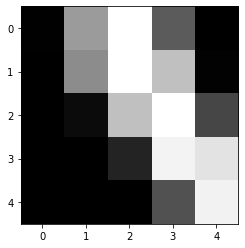

In [ ]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

Note that we need to pass just the 28x28 matrix to `plt.imshow`, without a channel dimension. We also pass a color map (`cmap=gray`) to indicate that we want to see a grayscale image.

## Training and Validation Datasets

While building real-world machine learning models, it is quite common to split the dataset into two parts:

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using gradient descent.
2. **Test set** - used to evaluate the model's performance

In the MNIST dataset, there are 60,000 training images and 10,000 test images. The test set is standardized so that different researchers can report their models' results against the same collection of images. 


It's essential to choose a random sample for creating a test set. Training data is often sorted by the target labels, i.e., images of 0s, followed by 1s, followed by 2s, etc. If we create a test set using the last 20% of images, it would only consist of 8s and 9s. In contrast, the training set would contain no 8s or 9s. Such a training-test would make it impossible to train a useful model.

We can now create data loaders to help us load the data in batches. We'll use a batch size of 100.




## Batch loading with DataLoader
Our training set contains 60,000 records. If we look ahead to our model we have 784 incoming features, hidden layers of 128 and 64 neurons, and 10 output features. Including the bias terms for each layer, the total number of parameters being trained is:<br>

$\begin{split}\quad(784\times128)+128+(128\times64)+64+(64\times10)+10 & = 109386\end{split}$<br>

For this reason it makes sense to load training data in batches using <a href='https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader'><tt><strong>DataLoader</strong></tt></a>.

In [ ]:
torch.manual_seed(101)  # for consistent results

# Data loader

batch_size = 100


train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

We set `shuffle=True` for the training data loader to ensure that the batches generated in each epoch are different. This randomization helps generalize & speed up the training process. On the other hand, since the validation data loader is used only for evaluating the model, there is no need to shuffle the images. 


In [ ]:
for images, labels in train_loader:
  break

In [ ]:
images.shape

torch.Size([100, 1, 28, 28])

In [ ]:
labels.shape

torch.Size([100])

In [ ]:
images

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [ ]:
labels

tensor([7, 2, 3, 5, 8, 5, 3, 6, 9, 9, 1, 3, 5, 5, 4, 5, 4, 1, 0, 4, 5, 4, 5, 4,
        0, 5, 8, 2, 2, 3, 3, 7, 2, 8, 1, 2, 3, 1, 7, 9, 0, 4, 9, 1, 7, 9, 7, 2,
        6, 5, 5, 8, 5, 0, 4, 0, 0, 4, 9, 2, 6, 0, 8, 4, 1, 8, 5, 2, 0, 3, 3, 4,
        6, 1, 5, 3, 5, 9, 0, 7, 4, 5, 3, 6, 6, 4, 5, 3, 9, 7, 1, 7, 6, 7, 9, 3,
        5, 9, 9, 6])

## Model

Now that we have prepared our data loaders, we can define our model.<br>
For this sample we'll use fully connected layers to develop a <a href='https://en.wikipedia.org/wiki/Multilayer_perceptron'>multilayer perceptron</a>.<br>
Our input size is 784 once we flatten the incoming 28x28 tensors.<br>
Our output size represents the 10 possible digits.<br>
We'll set our hidden layers to [128, 64] for now. Once you've completed the exercise feel free to come back and try different values.

![](https://raw.githubusercontent.com/dmlc/web-data/master/mxnet/image/mlp_mnist.png)

![NN-6](https://ichi.pro/assets/images/max/724/1*ghgPQFpY11Ssx70kkMFyfQ.png)

In [ ]:
class NeuralNet(nn.Module):
    def __init__(self,input_size,hidden_size1, hidden_size2, out_features):
        super(NeuralNet,self).__init__()
        
        
      # input (784) ---> h1 (128 neurons) -----h2 (64 neurons) -----output (10)

        self.fc1 = nn.Linear(input_size, hidden_size1)    # input layer
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)  # hidden layer
        self.out = nn.Linear(hidden_size2, out_features)  # output layer


    def forward(self, x):
        a1 = F.relu(self.fc1(x))
        a2 = F.relu(self.fc2(a1))
        out = self.out(a2)

        return out 

* A **logistic regression** model is almost identical to a linear regression model. It contains weights and bias matrices, and the output is obtained using simple matrix operations (`pred = x @ w.t() + b`). 

* As we did with linear regression, we can use `nn.Linear` to create the model instead of manually creating and initializing the matrices.

* Since `nn.Linear` expects each training example to be a vector, each `1x28x28` image tensor is _flattened_ into a vector of size 784 `(28*28)` before being passed into the model. 

* The output for each image is a vector of size 10, with each element signifying the probability of a particular target label (i.e., 0 to 9). The predicted label for an image is simply the one with the highest probability.

In [ ]:
# Hyper-parameters 
input_size = 784 # 28x28
hidden_size1 = 128
hidden_size2 = 64
out_features = 10

In [ ]:
torch.manual_seed(101)
model = NeuralNet(input_size, hidden_size1, hidden_size2, out_features)
model

NeuralNet(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)

## Count the model parameters

In [ ]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')
    
    
count_parameters(model)

100352
   128
  8192
    64
   640
    10
______
109386


## Define loss function & optimizer

In [ ]:
criterion = nn.CrossEntropyLoss()

learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

### reshaping tensor for model: flattening

In [ ]:
for images, labels in train_loader:
    print('Batch shape:', images.size())
    break

Batch shape: torch.Size([100, 1, 28, 28])


We can flatten them using <tt>.reshape()</tt>

In [ ]:
images.reshape(100,-1).size()

torch.Size([100, 784])

We can also flatten them using <tt>.view()</tt>

In [ ]:
images.view(100,-1).size()

torch.Size([100, 784])

## Train the model: Setup both training and evaluation (test)
This time we'll run the test data through the model during each epoch, so that we can compare loss & accuracy on the same plot.


<pre style='background-color:rgb(217,237,247)'>
predicted = torch.max(y_pred.data, 1)[1]</pre>
This uses the <a href='https://pytorch.org/docs/stable/torch.html#torch.max'><tt><strong>torch.max()</strong></tt></a> function. <tt>torch.max()</tt> returns a tensor of maximum values, and a tensor of the indices where the max values were found. In our code we're asking for the index positions of the maximum values along dimension 1. In this way we can match predictions up to image labels.</div>

In [ ]:
n = torch.tensor([[5., 4., 12., 11., 10., 8., 9., 5., 4., 3., 1., 1.]])

In [ ]:
n.shape

torch.Size([1, 12])

In [ ]:
torch.max(n.data,1)[1]

tensor([2])

### Training

In [ ]:
import time
start_time = time.time()

epochs = 5

train_losses = []
test_losses =  []
train_correct = []
test_correct =  []


for i in range(epochs):
    train_corr = 0
    test_corr = 0

  # Run the training batches
    for b, (X_train, y_train) in enumerate (train_loader):
        b+=1

  # Apply the model
        y_pred = model(X_train.view(100, -1))  # Here we flatten X_train
        loss = criterion(y_pred, y_train)


  # Collect the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr

  # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


  # Print interim results
        if b%100 == 0:
            print(f'epoch: {i}  batch: {b} [{100*b}/60000]  loss: {loss.item():10.8f}  \
            accuracy: {train_corr.item()*100/(100*b):7.3f}%')

    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(train_corr)

###########################################################################################################33


    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test.view(100, -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    tst_loss = criterion(y_val, y_test)
    test_losses.append(tst_loss)
    test_correct.append(test_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed  
          

epoch: 0  batch: 100 [10000/60000]  loss: 0.31536466              accuracy:  72.980%
epoch: 0  batch: 200 [20000/60000]  loss: 0.36739272              accuracy:  81.130%
epoch: 0  batch: 300 [30000/60000]  loss: 0.29623920              accuracy:  84.490%
epoch: 0  batch: 400 [40000/60000]  loss: 0.20985298              accuracy:  86.547%
epoch: 0  batch: 500 [50000/60000]  loss: 0.15247929              accuracy:  87.972%
epoch: 0  batch: 600 [60000/60000]  loss: 0.26335061              accuracy:  88.958%
epoch: 1  batch: 100 [10000/60000]  loss: 0.09054718              accuracy:  94.800%
epoch: 1  batch: 200 [20000/60000]  loss: 0.13786045              accuracy:  94.970%
epoch: 1  batch: 300 [30000/60000]  loss: 0.19063243              accuracy:  94.980%
epoch: 1  batch: 400 [40000/60000]  loss: 0.09505980              accuracy:  95.150%
epoch: 1  batch: 500 [50000/60000]  loss: 0.16571039              accuracy:  95.206%
epoch: 1  batch: 600 [60000/60000]  loss: 0.15044974             

## Plot the loss and accuracy comparisons

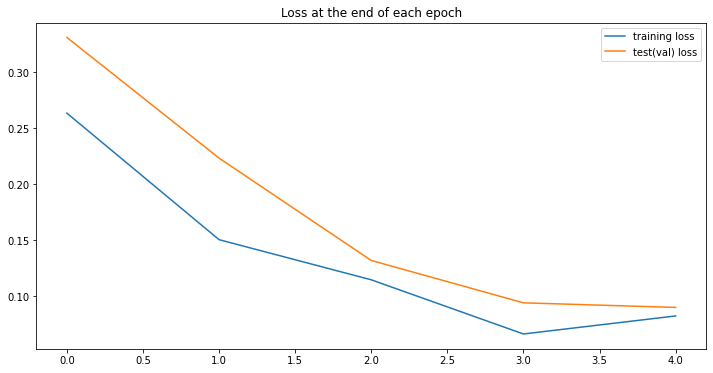

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='test(val) loss')
plt.title('Loss at the end of each epoch')
plt.legend();

In [ ]:
train_correct

[tensor(53375), tensor(57205), tensor(57930), tensor(58443), tensor(58721)]

In [ ]:
train_correct[0]

tensor(53375)

In [ ]:
train_correct[-1]/600

tensor(97.8683)

In [ ]:
test_correct

[tensor(9422), tensor(9598), tensor(9667), tensor(9703), tensor(9735)]

In [ ]:
test_correct[-1]/100

tensor(97.3500)

## Evaluate Test Data
We retained the test scores during our training session:

In [ ]:
print(test_correct) # contains the results of all epochs
print()
print(f'Test accuracy: {test_correct[-1].item()*100/10000:.3f}%') # print the most recent result as a percent

[tensor(9422), tensor(9598), tensor(9667), tensor(9703), tensor(9735)]

Test accuracy: 97.350%


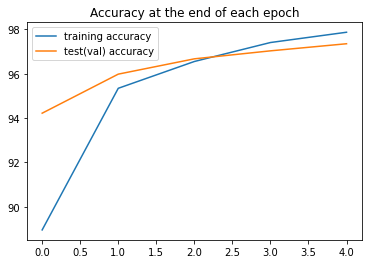

In [ ]:
plt.plot([t/600 for t in train_correct], label='training accuracy')
plt.plot([t/100 for t in test_correct], label='test (val) accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

However, we'd like to compare the predicted values to the ground truth (the y_test labels), so we'll run the test set through the trained model all at once.

In [ ]:
# Extract the data all at once, not in batches
test_all_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=10000, 
                                          shuffle=False)

In [ ]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_all_loader:
        y_val = model(X_test.view(len(X_test), -1))  # pass in a flattened view of X_test
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(test_dataset)} = {correct.item()*100/(len(test_dataset)):7.3f}%')

Test accuracy: 9735/10000 =  97.350%


Not bad considering that a random guess gives only 10% accuracy!

## Display the confusion matrix
This uses scikit-learn, and the predicted values obtained above.

In [ ]:
from sklearn.metrics import confusion_matrix  # for evaluating results


# print a row of values for reference
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))
print(np.arange(10).reshape(1,10))
print()

# print the confusion matrix
print(confusion_matrix(predicted.view(-1), y_test.view(-1)))

[[   0    1    2    3    4    5    6    7    8    9]]

[[ 970    0    8    1    3    3    7    0    9    4]
 [   0 1115    1    0    0    0    3    3    1    3]
 [   0    5 1008    5    3    0    1    8    4    0]
 [   2    1    1  978    0    3    1    0    8    8]
 [   1    0    2    0  961    2    1    0    6   17]
 [   4    1    0    7    0  865    3    0    4    3]
 [   1    5    3    0    6   11  938    0    4    1]
 [   1    3    8   12    3    2    1 1012    8   11]
 [   1    5    1    4    0    4    3    1  927    1]
 [   0    0    0    3    6    2    0    4    3  961]]


This shows that the model had the greatest success with ones, twos and sevens, and the lowest with fives, sixes and eights.

## Examine the misses
We can track the index positions of "missed" predictions, and extract the corresponding image and label. We'll do this in batches to save screen space.

In [ ]:
misses = np.array([])
for i in range(len(predicted.view(-1))):
    if predicted[i] != y_test[i]:
        misses = np.append(misses,i).astype('int64')
        
# Display the number of misses
len(misses)

265

In [ ]:
# Display the first 10 index positions
misses[:10]

array([  61,  247,  259,  290,  321,  381,  445,  448,  495,  578])

In [ ]:
# Set up an iterator to feed batched rows
r = 12   # row size
row = iter(np.array_split(misses,len(misses)//r+1))

Now that everything is set up, run and re-run the cell below to view all of the missed predictions.<br>
Use <kbd>Ctrl+Enter</kbd> to remain on the cell between runs. You'll see a <tt>StopIteration</tt> once all the misses have been seen.

Index: [ 691  717  720  740  760  844  882  938  947  951  956  965]
Label: [   8    0    5    4    4    8    9    3    8    5    1    6]
Guess: [   4    6    8    9    9    7    7    5    9    4    2    0]


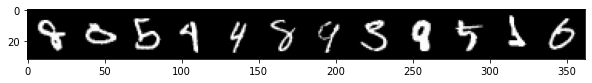

In [ ]:
from torchvision.utils import make_grid


nextrow = next(row)
print("Index:", nextrow)
print("Label:", y_test.index_select(0,torch.tensor(nextrow)).numpy())
print("Guess:", predicted.index_select(0,torch.tensor(nextrow)).numpy())

images = X_test.index_select(0,torch.tensor(nextrow))
im = make_grid(images, nrow=r)
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

## Testing with individual images

While we have been tracking the overall accuracy of a model so far, it's also a good idea to look at model's results on some sample images. Let's test out our model with some images from the predefined test dataset of 10000 images. We begin by recreating the test dataset with the `ToTensor` transform.

Here's a sample image from the dataset.

Shape: torch.Size([1, 28, 28])
Label: 7


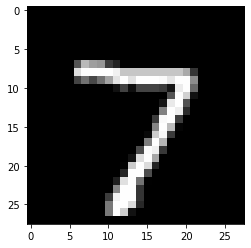

In [ ]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

Let's define a helper function `predict_image`, which returns the predicted label for a single image tensor.

In [ ]:
def predict_image(img, model):
    image = img.reshape(-1,28*28)
    yb = model(image)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

`img.unsqueeze` simply adds another dimension at the begining of the 1x28x28 tensor, making it a 1x1x28x28 tensor, which the model views as a batch containing a single image.

Let's try it out with a few images.

Label: 5 , Predicted: 5


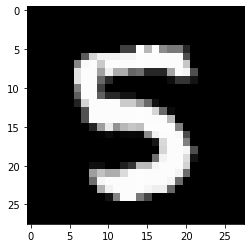

In [ ]:
img, label = test_dataset[120]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


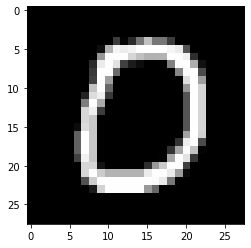

In [ ]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 9


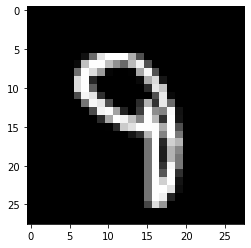

In [ ]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 4 , Predicted: 9


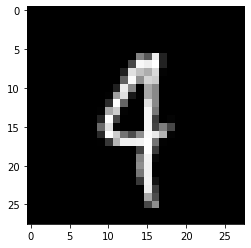

In [ ]:
img, label = test_dataset[1242]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

## Summary and Further Reading

We've created a fairly sophisticated training and evaluation pipeline in this tutorial. Here's a list of the topics we've covered:

* Working with images in PyTorch (using the MNIST dataset)
* Splitting a dataset into training, validation and test sets
* Creating PyTorch models with custom logic by extending the `nn.Module` class
* Interpreting model ouputs as probabilities using softmax, and picking predicted labels
* Picking a good evaluation metric (accuracy) and loss function (cross entropy) for classification problems
* Setting up a training loop that also evaluates the model using the test set
* Testing the model manually on randomly picked examples 

There's a lot of scope to experiment here, and I encourage you to use the interactive nature of Jupyter to play around with the various parameters. Here are a few ideas:

* Try making the training set smaller or larger, and see how it affects the model.
* Try changing the learning rate and see if you can achieve the same accuracy in fewer epochs.
* Try changing the batch size. What happens if you use too high a batch size, or too low?
* Try building a model for a different dataset, such as the [CIFAR10 or CIFAR100 datasets](https://www.cs.toronto.edu/~kriz/cifar.html).

Here are some references for further reading:
* For a more mathematical treatment, see the popular [Machine Learning](https://www.coursera.org/lecture/machine-learning/classification-wlPeP) course on Coursera. Most of the images used in this tutorial series have been taken from this course.
* The training loop defined in this notebook was inspired from [FastAI development notebooks](https://github.com/fastai/fastai_docs/blob/master/dev_nb/001a_nn_basics.ipynb) which contain a wealth of other useful stuff if you can read and understand the code.
* For a deep dive into softmax and cross entropy, see [this blog post on DeepNotes](https://deepnotes.io/softmax-crossentropy).
